In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# Read CSV file:
# Make sure to set header as none

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [4]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [ ]:
# Heart disease dataset
# hd = 0 = no heart, 1 = some, 2 = full heart disease

# Reclassification

# Some columns - have question marks

In [6]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df.info()

# Object - string data point somewhere in there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
# To find the strings
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
# Coding
df[~df["ca"].str.isnumeric()]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [11]:
# Check Unique-Values
df[df['ca']=='?'].index.values

array([166, 192, 287, 302], dtype=int64)

In [13]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [14]:
df[df['thal']=='?'].index.values

array([ 87, 266], dtype=int64)

In [15]:
# Drop observations
# drop observations
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)

In [16]:
df = df.drop(to_drop)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [18]:
df['ca'] = pd.to_numeric(df['ca']) # force type change
df['thal'] = pd.to_numeric(df['thal']) # force type change

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


# Data Exploration

<AxesSubplot:xlabel='hd', ylabel='thalach'>

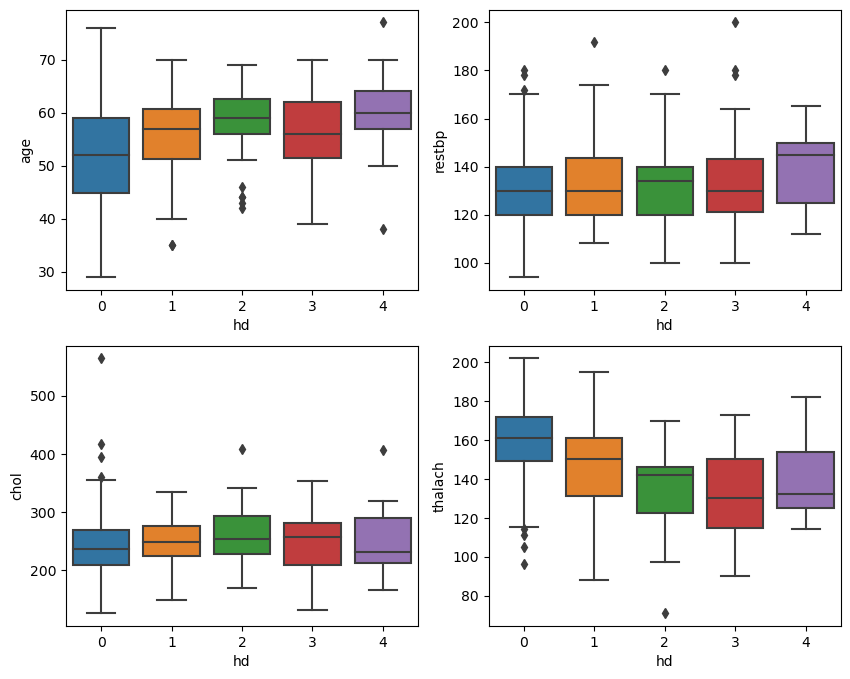

In [20]:
# Continuous Variables

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='hd', y='age', data=df, ax=ax1)
sns.boxplot(x='hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='hd', y='thalach', data=df, ax=ax4)

In [21]:
# Check 
# check output variable
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [22]:
# binary output
# fixed mapping - so any number higher than 
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['binary_hd'] = df['hd'].map(mapping)

In [23]:
df.groupby('binary_hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
binary_hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<AxesSubplot:xlabel='binary_hd', ylabel='thalach'>

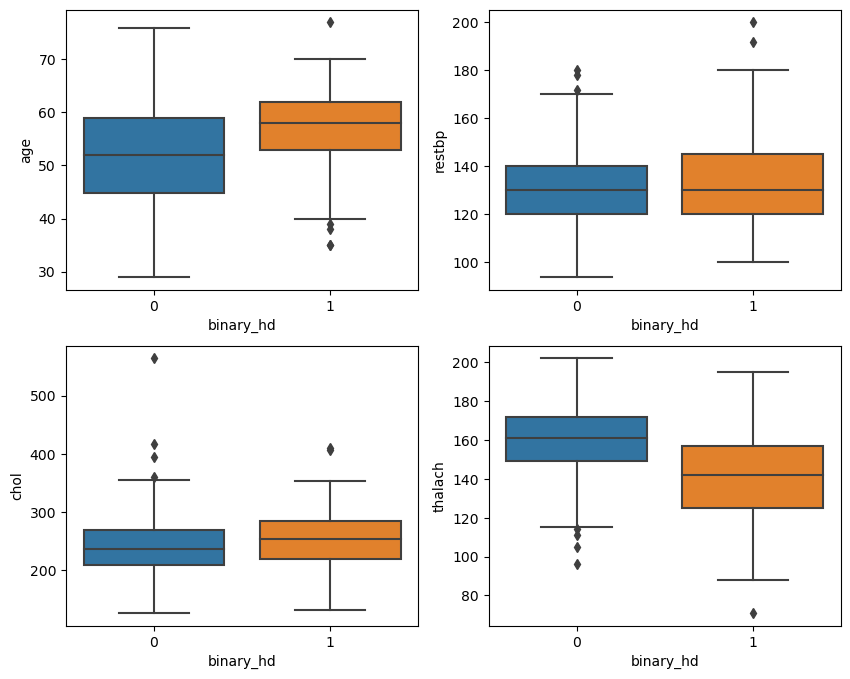

In [24]:
# continuous variables - age, restbp, chol, thalach
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x='binary_hd', y='age', data=df, ax=ax1)
sns.boxplot(x='binary_hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='binary_hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='binary_hd', y='thalach', data=df, ax=ax4)

In [29]:
# Groupby, from total percentage
df.groupby(["binary_hd", "sex"])["age"].count().unstack() / len(df)

# Sex = 0 = Male, 1 = Female

sex,0.0,1.0
binary_hd,,
0,0.239057,0.299663
1,0.084175,0.377104


In [33]:
df.groupby(['binary_hd','sex'])['age'].count().unstack()

sex,0.0,1.0
binary_hd,,
0,71,89
1,25,112


<AxesSubplot:xlabel='binary_hd'>

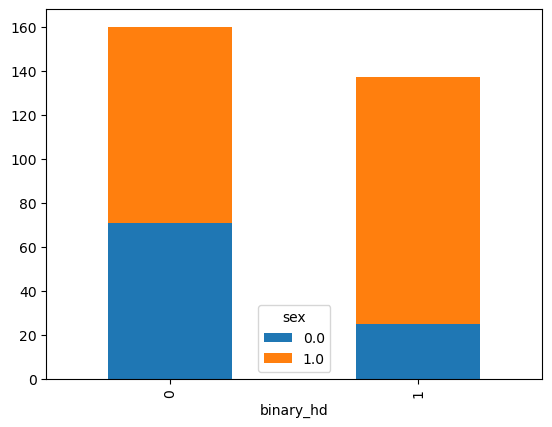

In [30]:
# Wide view = for plotting 
df.groupby(['binary_hd','sex'])['age'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='binary_hd'>

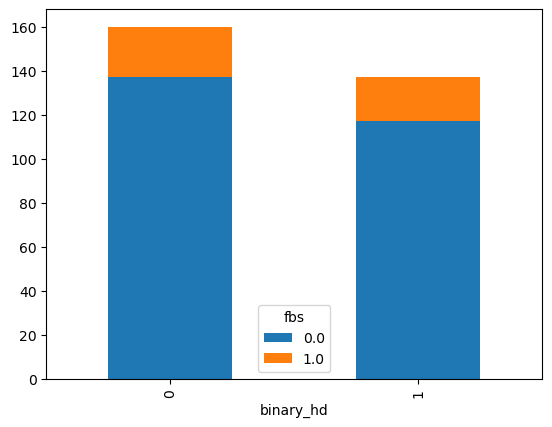

In [34]:
# Wide view = for plotting 
df.groupby(['binary_hd','fbs'])['age'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='binary_hd'>

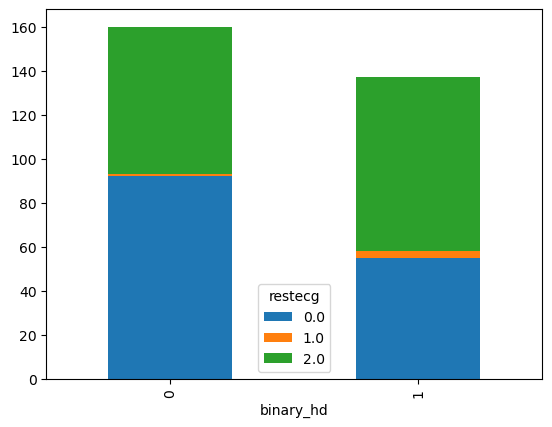

In [36]:
# Wide view = for plotting 
df.groupby(['binary_hd','restecg'])['age'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='binary_hd'>

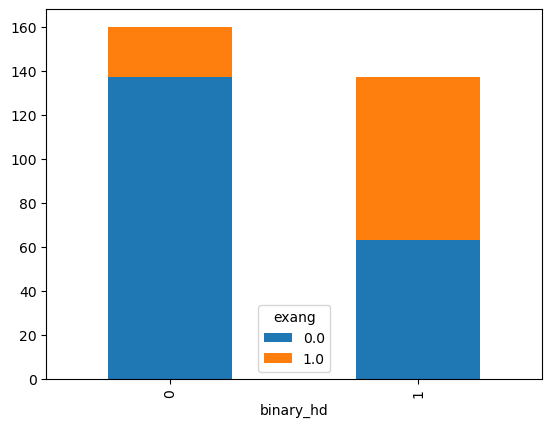

In [37]:
# Wide view = for plotting 
df.groupby(['binary_hd','exang'])['age'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='binary_hd'>

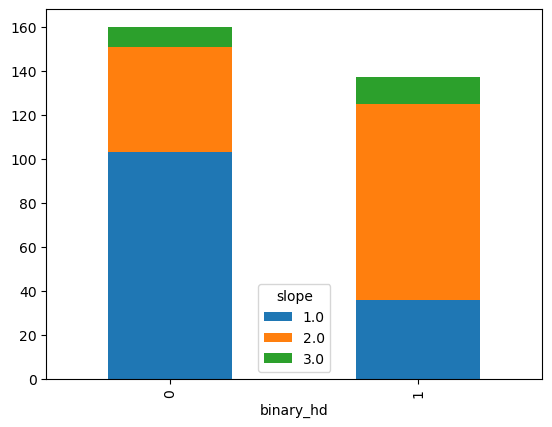

In [38]:
# Check old peak?
# Wide view = for plotting 
df.groupby(['binary_hd','slope'])['age'].count().unstack().plot(kind='bar', stacked=True)

In [39]:
# Dummy
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal']

In [40]:
# See what they say for feature importance
X = df.iloc[:, :13]
y = df['binary_hd']

In [41]:
# Classification Models and RandomTree/DecisionTree is not concerned with multi-colinearity
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [42]:
X_encoded

,age,restbp,chol,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,2.3,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,1.5,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,2.6,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,3.5,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,1.4,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.2,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,1.2,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,3.4,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,1.2,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [43]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [44]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

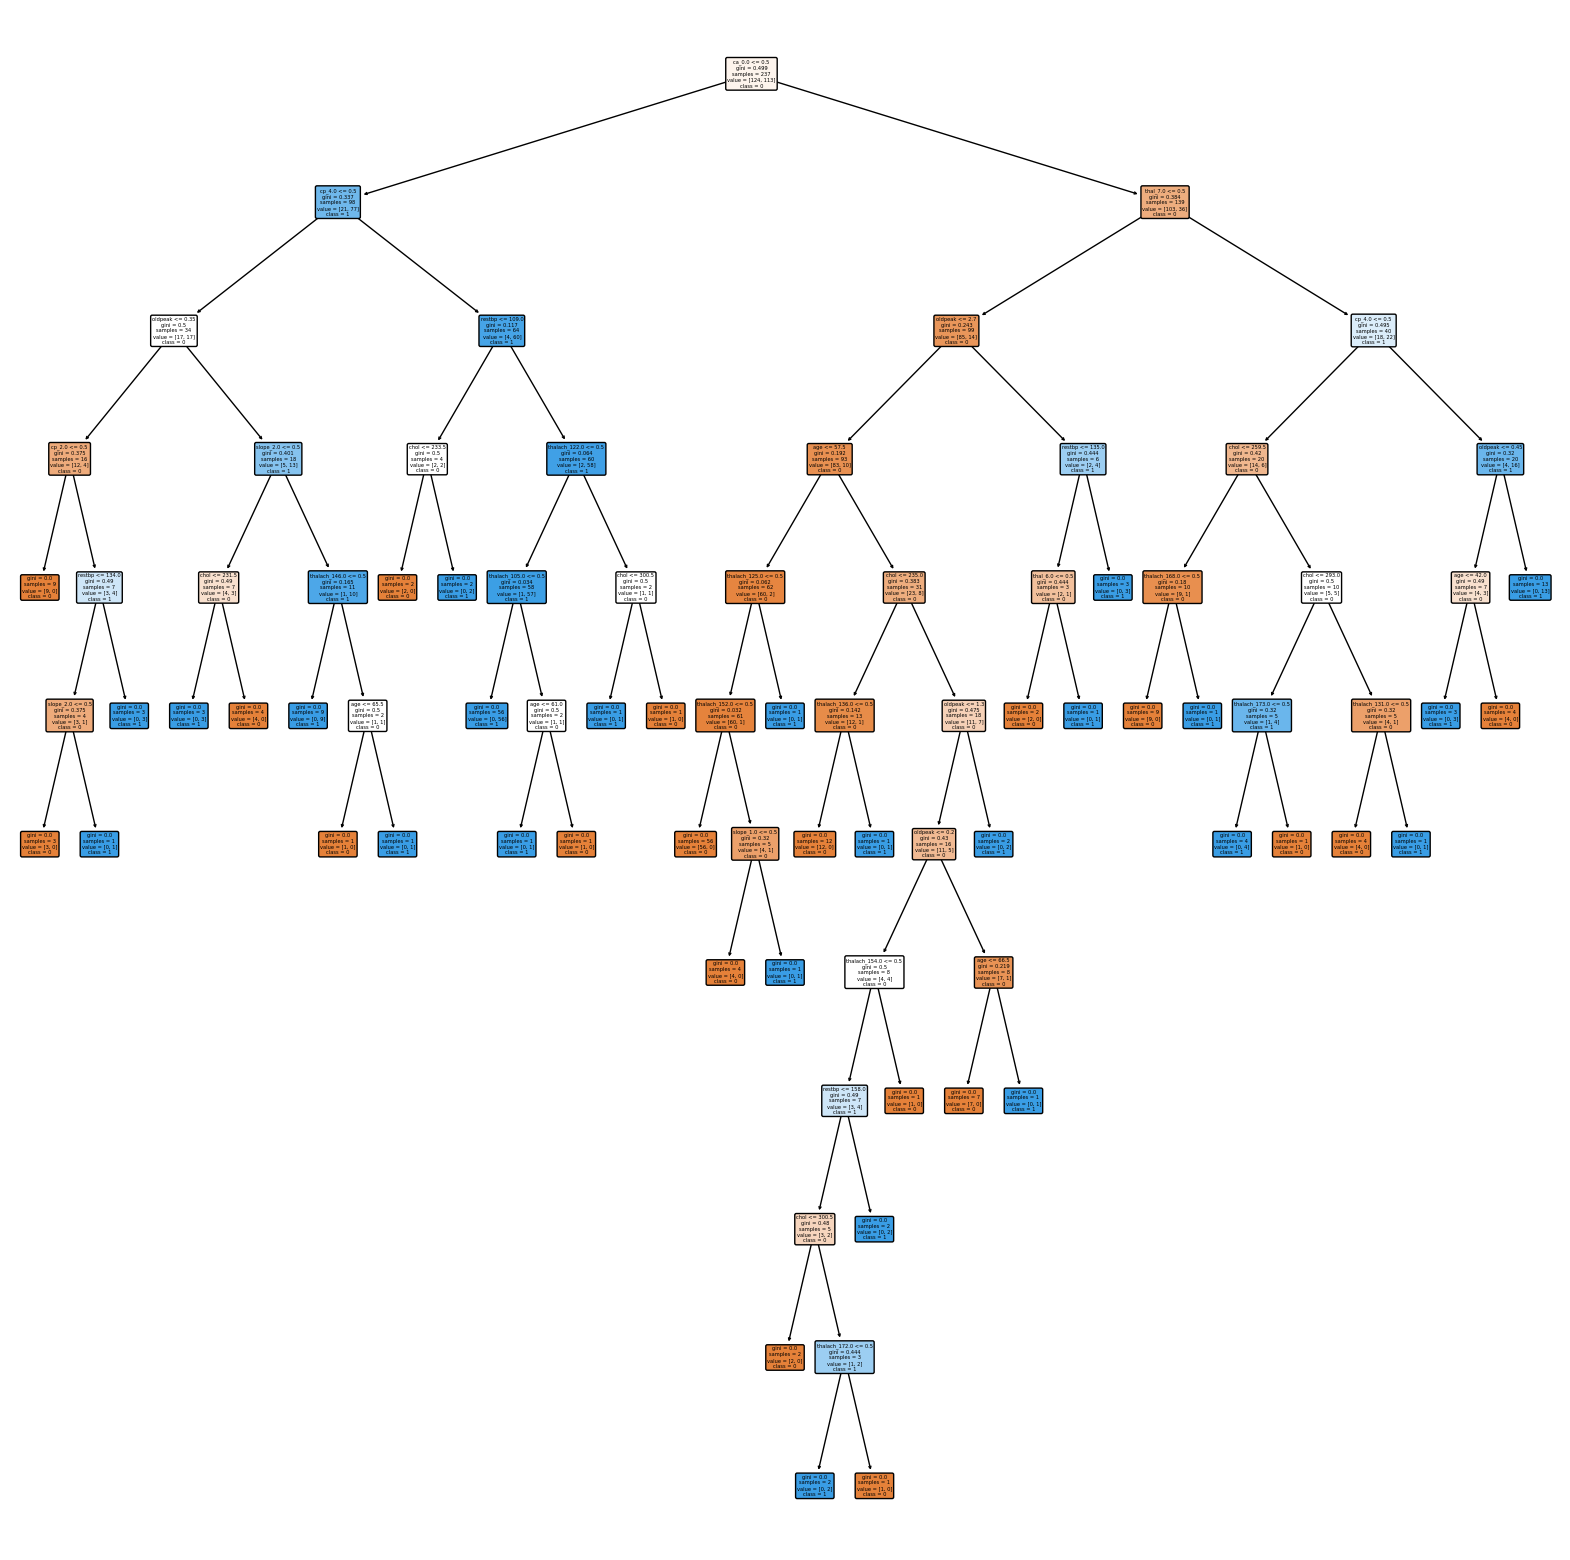

In [45]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [46]:
# prediction
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)


In [48]:
# Without constraints, we see each tree is perfectly fit to training data
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

1.0
0.85


In [ ]:
# Similar performance metrics on train/test - can also check with validation split

In [52]:
# New y is "hd"
y_2 = df["hd"]

In [53]:
# Second Train/Test split:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y_2, test_size=0.2, random_state=42)

In [55]:
# Define and pick the model, and fit it:
dt2 = DecisionTreeClassifier(random_state=123)
dt2 = dt2.fit(X_train2, y_train2)

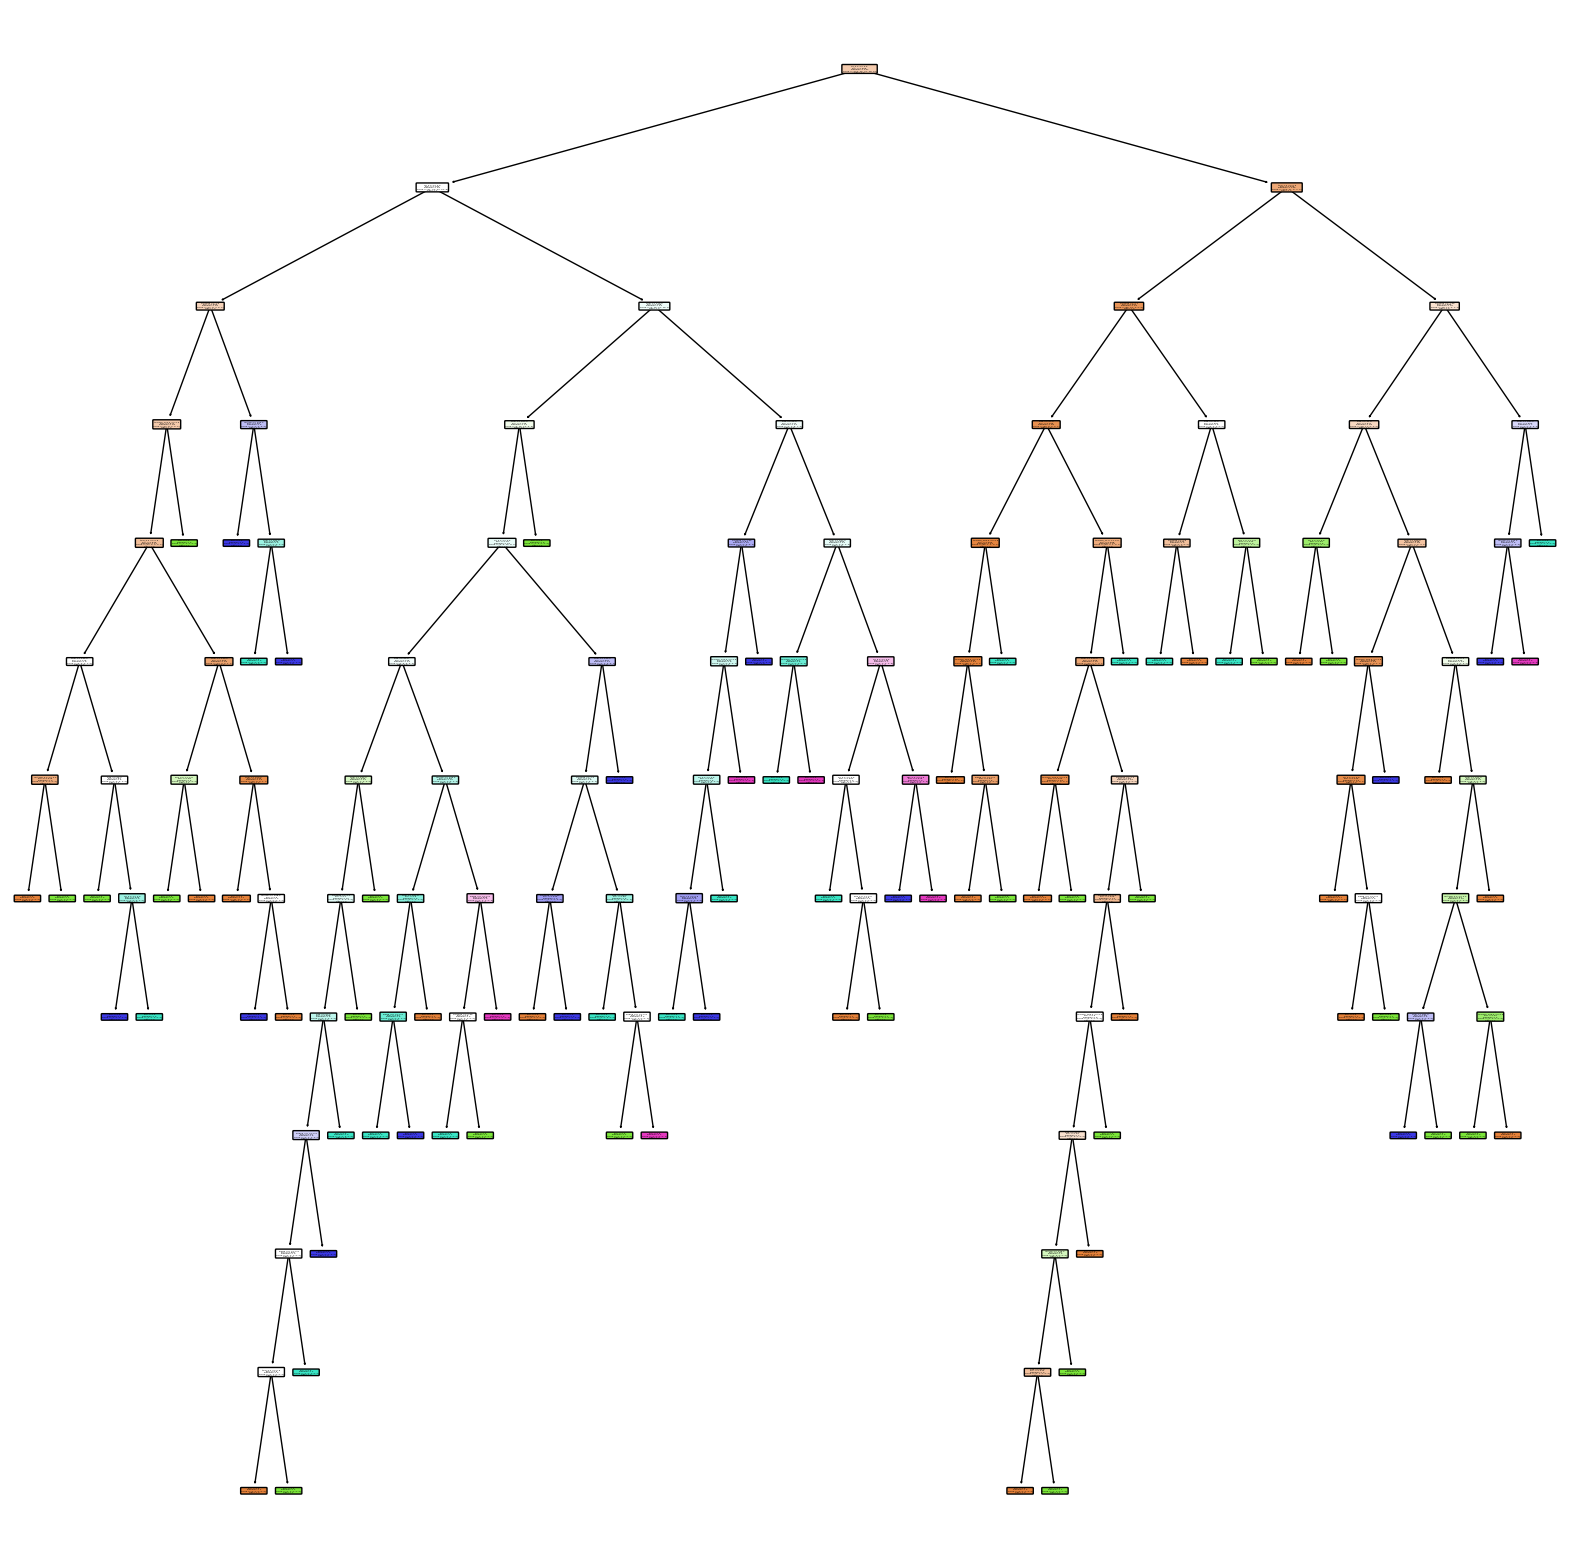

In [56]:
# Apply figure:
plt.figure(figsize=(20,20))
plot_tree(dt2, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);

In [58]:
# Apple some predictions:
pred_train2 = dt2.predict(X_train2)
pred_test2 = dt2.predict(X_test2)

In [59]:
# Even more fitted - we can use confusion matrix that it's not that good...
confusion_matrix(y_test2, pred_test2)

array([[29,  2,  2,  2,  1],
       [ 3,  3,  0,  2,  1],
       [ 0,  2,  0,  2,  1],
       [ 0,  6,  0,  1,  0],
       [ 0,  0,  1,  2,  0]], dtype=int64)

In [62]:
accuracy_score(y_train2, pred_train2)

1.0

In [63]:
accuracy_score(y_test2, pred_test2)

0.55

In [64]:
pred_train2 = dt.predict(X_train2)
pred_test2 = dt.predict(X_test2)

In [65]:
confusion_matrix(y_test2, pred_test2)

# The model doesn't have any predictions into Category 2-4

array([[30,  6,  0,  0,  0],
       [ 2,  7,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 1,  2,  0,  0,  0]], dtype=int64)

In [66]:
# Fix the overfitting
dt = DecisionTreeClassifier(max_depth = 6,random_state=123)
dt = dt.fit(X_train, y_train)

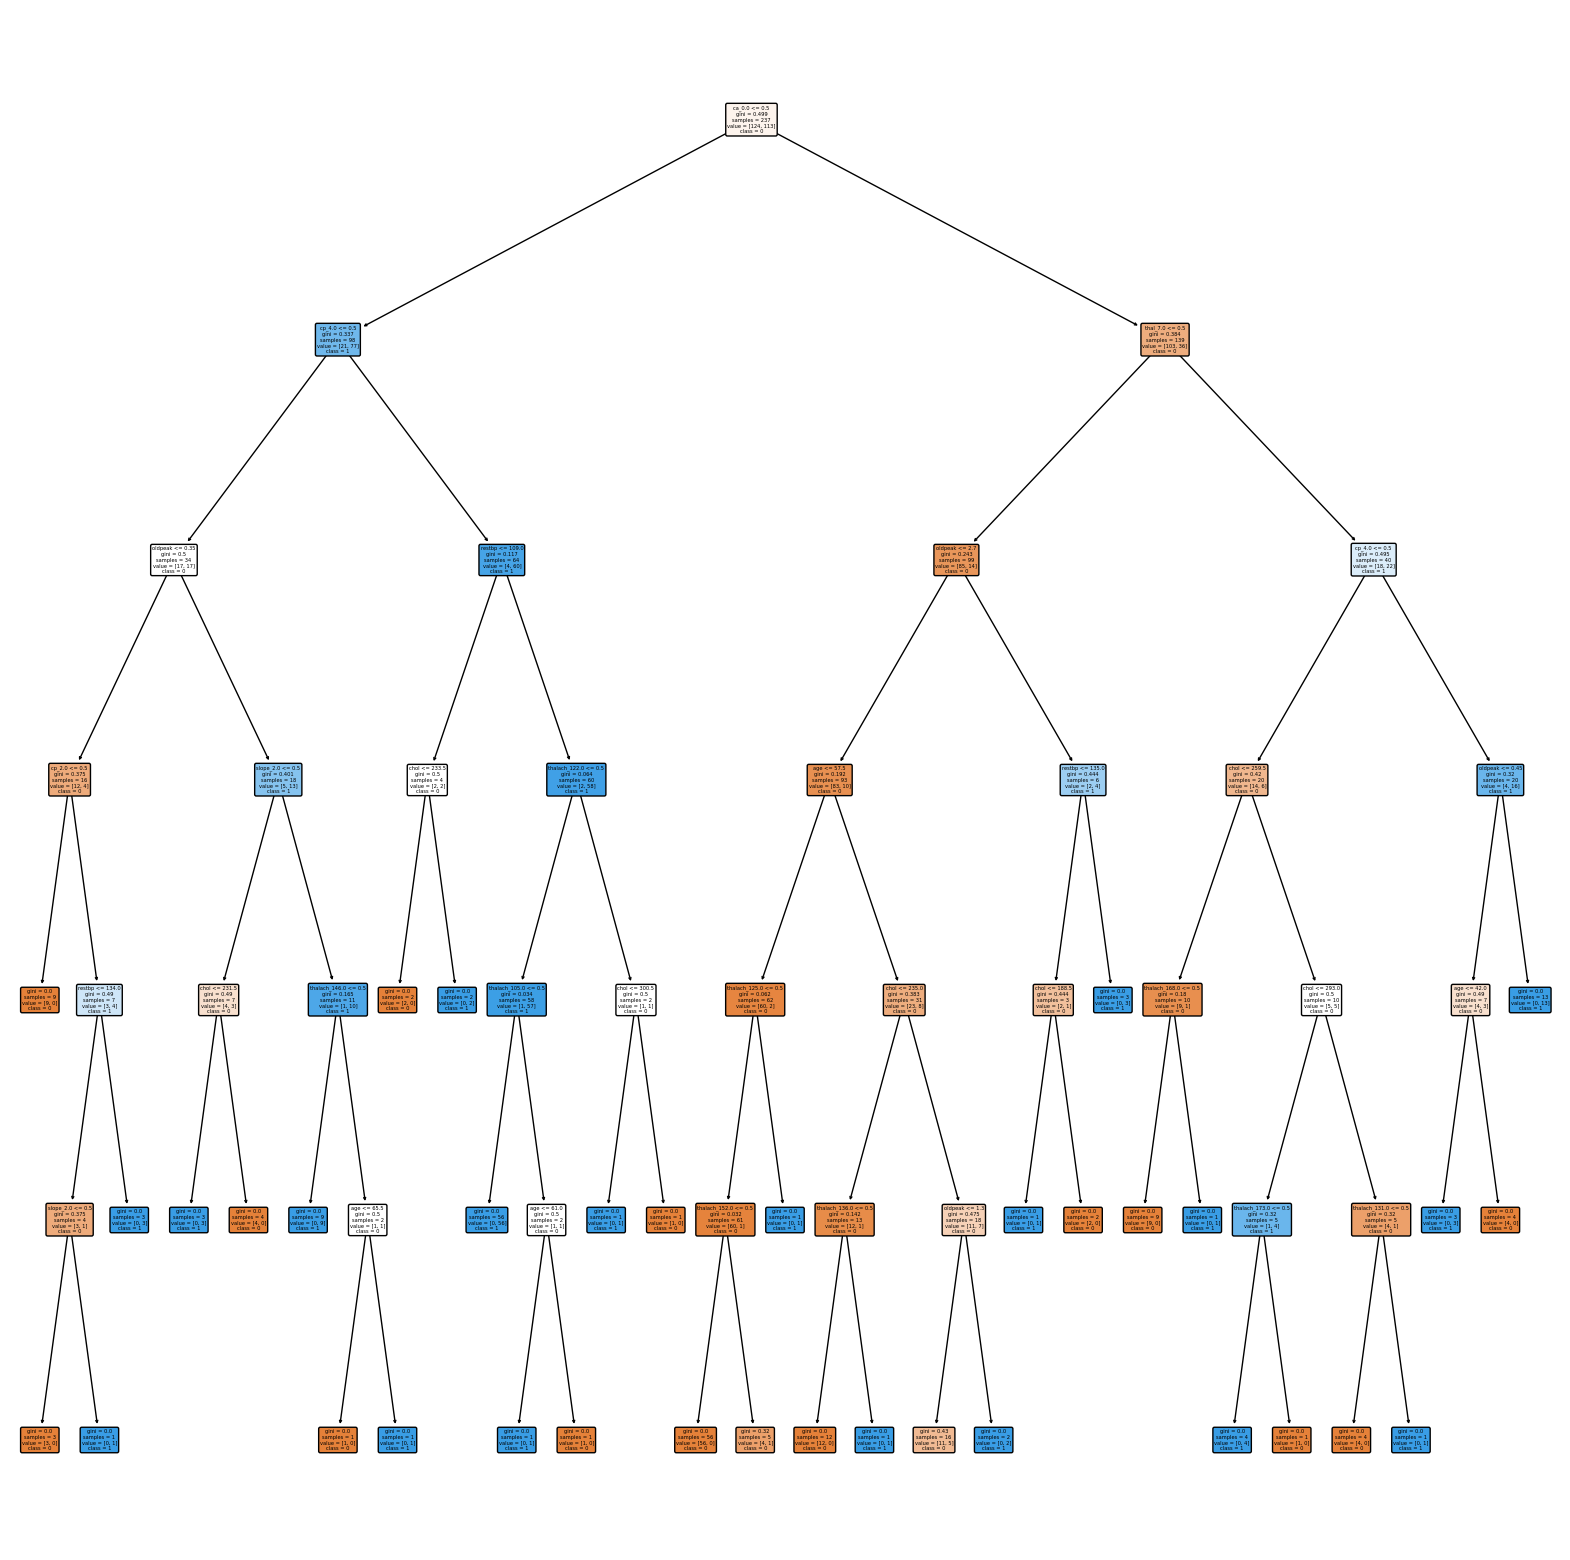

In [67]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [68]:
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)

In [69]:
# without constraints we can see the tree is perfectly fitted to the training data
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

0.9746835443037974
0.8333333333333334


In [70]:
# Params Search to find best level
# example

params = {
"max_depth": [2,3,4,5,6,7,8],
"min_samples_split": [8,10,15,20],
"min_samples_leaf": [4,8,10,20]
}

In [71]:
# Import GridSearch CV

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt, params, cv = 5, verbose = 1, scoring = "accuracy")

In [73]:
# Training
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=123),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [4, 8, 10, 20],
                         'min_samples_split': [8, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [77]:
# print best params
type(grid_search.best_params_)

dict

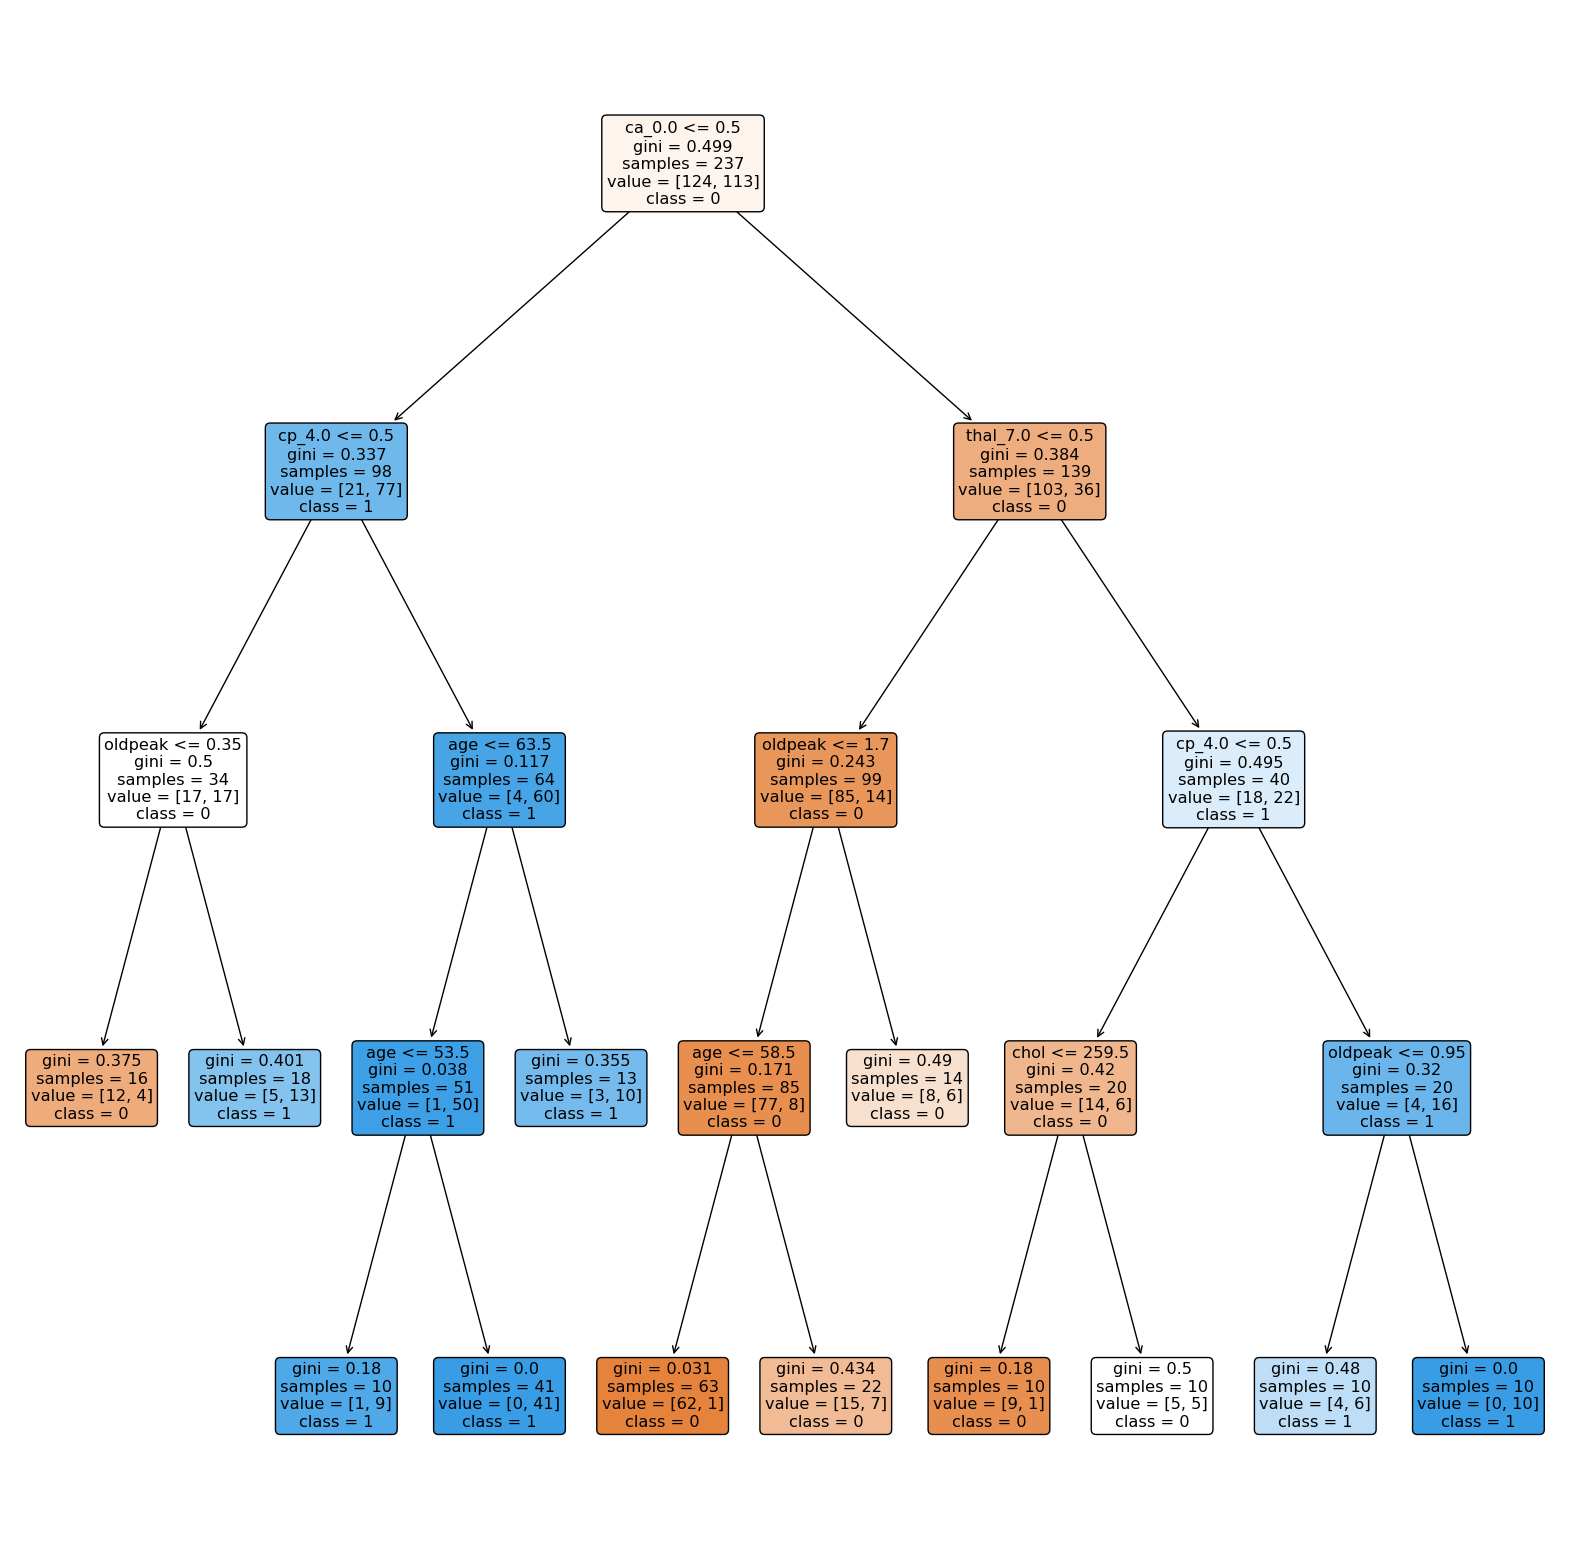

In [76]:
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=10, min_samples_split=8,random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [ ]:
# Prediction Train 
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)

# Much higher accuracy - generally best practice for checking overfitting
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

In [ ]:
# New Model:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [ ]:
# Homework - try multiclass

# Instead of Decision Tree Classif, Decision Tree Regression

In [ ]:
# Open book - my notes, your notes
# Cannot use ChatGPT, no google

# Having notes like scikit learn open
# Documentation for libraries
# Should not need code outside what was covered in class


# Performance Metrics, Cross-Validations

# Delina will cover the topics, everything after the midterm

In [ ]:
# Given a dataset, it will be clean

# Purely modelling problem

In [ ]:
# 10 M/C  questions